# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import pickle
import os

In [2]:
# max number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

In [3]:
# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

df_iris = pd.DataFrame(iris.data)
df_iris.columns = iris.feature_names

# given answer labels
y_iris = iris.target

# inserting the y_iris as a column in the dataset
df_iris.insert(df_iris.shape[1], 'target', y_iris, True)

In [5]:
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [6]:
# extracting data based on the target labels
df_setosa = df_iris[df_iris['target']==0]
df_versicolor = df_iris[df_iris['target']==1]
df_virginica = df_iris[df_iris['target']==2]

2 Main features: petal lengths and petal widths

We will first plot for petal lengths and petal widths

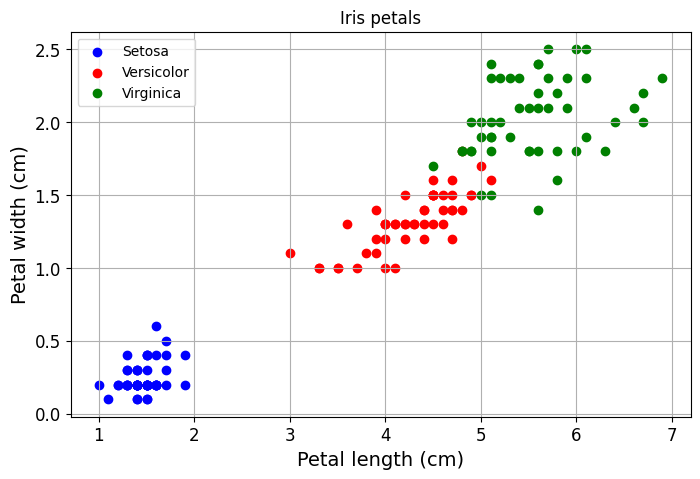

In [7]:
# set up the plot
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

# set labels and scatter points
ax.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'],
           label="Setosa", facecolor="blue")

ax.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'],
           label="Versicolor", facecolor="red")

ax.scatter(df_virginica['petal length (cm)'], df_virginica['petal width (cm)'],
           label="Virginica", facecolor="green")

ax.set_xlabel("Petal length (cm)")
ax.set_ylabel("Petal width (cm)")
ax.set_title("Iris petals")
ax.grid()
ax.legend()

We will assume that the labels are unknown. By clustering we will dicover the clusters.

# K-Means Clustering

In [9]:
from sklearn.cluster import KMeans

cols = ['petal length (cm)', 'petal width (cm)']
X = np.array(df_iris[cols])

In [20]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'], label="Setosa", facecolor="blue")
    plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'], label="Versicolor", facecolor="red")
    plt.scatter(df_virginica['petal length (cm)'], df_virginica['petal width (cm)'], label="Virginica", facecolor="green")
    
    # for showing a round white background behind the centroid marks
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=13, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=15, linewidths=15,
                color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
        # shows up as X with subscript 2
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [14]:
X.shape

(150, 2)

C:\Users\Debarati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


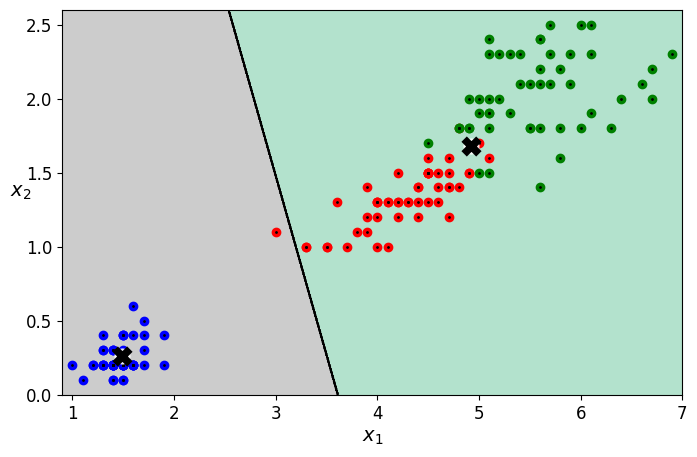

In [30]:
# 2 clusters

kMeans_k2 = KMeans(n_clusters=2, random_state=42)

#fit the data
kMeans_k2.fit(X)

plt.figure(figsize=(8,5))
plot_decision_boundaries(kMeans_k2, X)
plt.show()

In [32]:
def evaluate_pred(y_true, y_pred):
    return sum([1 if y_true[i]==y_pred[i] else 0 for i in range(len(y_true))])*100/len(y_true)

This evaluate_pred() function would work in general for supervised machine learning tasks, but here the targets are unknown, hence it is un-supervised. In this case, evaluation strategies used are:

1. Inertia
2. Silhoutte score

C:\Users\Debarati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


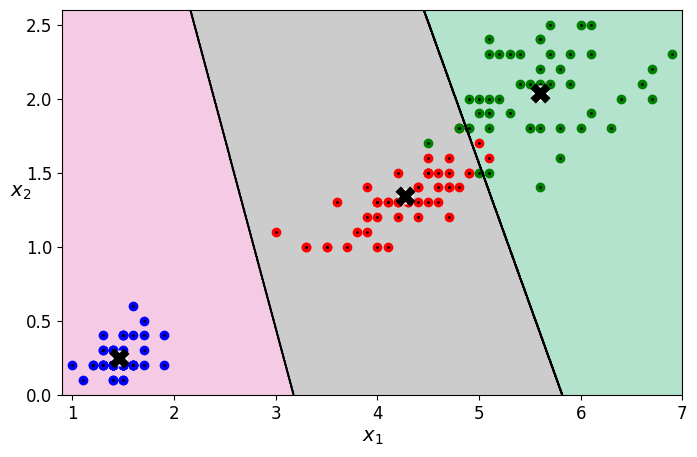

In [34]:
# Three clusters
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
# Fit the data
y_pred = kmeans_k3.fit(X)

plt.figure(figsize=(8, 5))
plot_decision_boundaries(kmeans_k3, X)
plt.show()

C:\Users\Debarati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


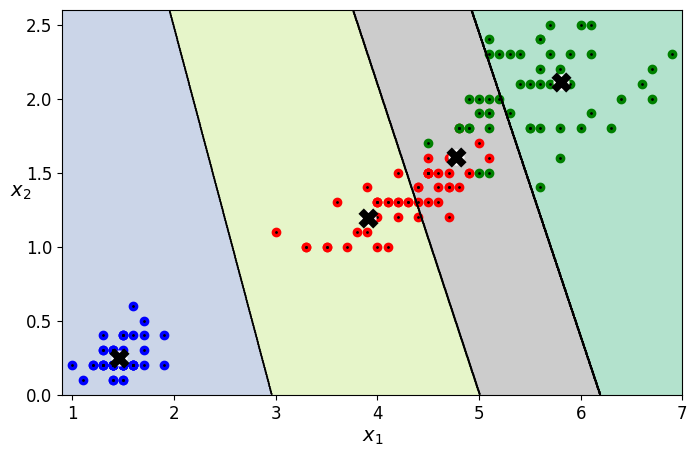

In [38]:
# Four clusters
kmeans_k4 = KMeans(n_clusters=4, random_state=42)
# y_pred gives the predicted labels corresponding to the clusters
y_pred = kmeans_k4.fit(X)

plt.figure(figsize=(8, 5))
plot_decision_boundaries(kmeans_k4, X)
plt.show()

### Inertia

To select the best model, we will need a way to evaluate its performance. Unfortunately, clustering is an unsupervised task, so we do not have the comparison with targets. But at least we can measure the mean squared distance between each instance and its closest centroid. This is the idea behind the inertia metric.

Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

In [40]:
print("K=2", kMeans_k2.inertia_)
print("K=3", kmeans_k3.inertia_)
print("K=4", kmeans_k4.inertia_)

K=2 86.39021984551395
K=3 31.371358974358984
K=4 19.465989010989013


As we increase K, the clusters get smaller, and each point in the clusters gets closer to the respective centroid. So measuring how much the inertia value has reduced would give an incorrect evaluation of the model.

Elbow-method: plotting inertia as a function of K

In [41]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)  for k in range(1,9)]

inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\Debarati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Debarati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Debarati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

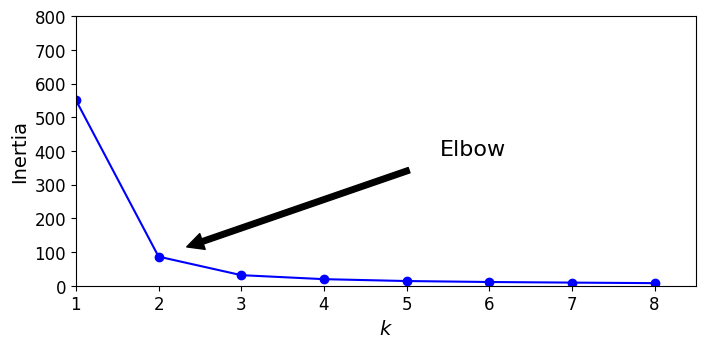

In [43]:
plt.figure(figsize=(8,3.5))
plt.plot(range(1,9), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1,8.5,0,800])
plt.show()

### Silhouette Score

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to

(b−a)/max(a,b)

where

- a is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and
- b  is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes  b, excluding the instance's own cluster).


The silhouette coefficient can vary between -1 and +1:

- a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters,
- a coefficient close to 0 means that it is close to a cluster boundary,
- a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [44]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

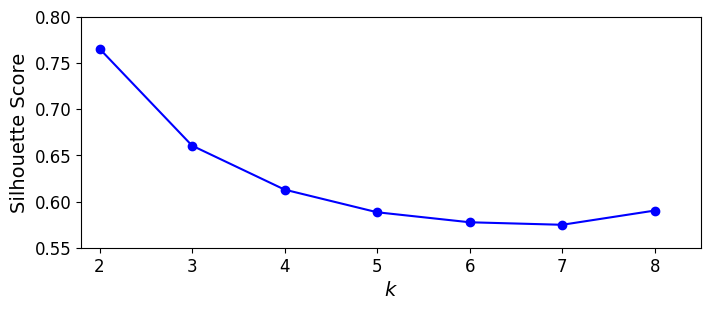

In [46]:
plt.figure(figsize=(8,3))
plt.plot(range(2,9), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.axis([1.8,8.5, 0.55, 0.8])
plt.show()

The silhoulette scores indicates that the optimal number of clusters is 2 and possibily 3 since after 3 the silhoulette score drops to below 65%.